In [11]:
# Import necessary libraries
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Load data from CSV without column names, specifying encoding and low_memory=False
data = pd.read_csv('Train_data.csv', header=None, encoding='ISO-8859-1', low_memory=False)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#You have a 'plot_summary' column in your dataset
def preprocess_plot(plot):
    plot = BeautifulSoup(plot, "html.parser")  # Use 'html.parser' as the parser
    letters_only = re.sub("[^a-zA-Z]", " ", plot.get_text())
    lower_case = letters_only.lower()
    # Tokenize the lowercased text
    words = word_tokenize(lower_case)

    stops = set(stopwords.words("english"))

    # Initialize a Snowball stemmer for English
    stemmer = SnowballStemmer("english")

    # Stem and remove stopwords
    meaningful_words = [stemmer.stem(w) for w in words if not w in stops]

    return " ".join(meaningful_words)

# Apply preprocessing to the 'plot_summary' column
data[3] = data[3].apply(preprocess_plot)

# Drop the first two columns
data = data.iloc[:, [2, 3]]  # Keep only the 'genre' and 'plot' columns

# Rename the columns to 'genre' and 'plot'
data.columns = ['genre', 'plot']

# Perform one-hot encoding on the 'genre' column
data_encoded = pd.get_dummies(data, columns=['genre'], drop_first=False)

plot_summaries = data['plot']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # You can adjust max_features as needed

# Fit and transform the plot summaries to TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(plot_summaries)
# Extract the one-hot encoded target variable (genre columns) for training
y_encoded = data_encoded.drop('plot', axis=1)

# Create and train the OneVsRestClassifier with Logistic Regression
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_tfidf, y_encoded)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-11-4fa3a279c6fb>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  plot = BeautifulSoup(plot, "html.parser")  # Use 'html.parser' as the parser


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [12]:
test_data = pd.read_csv('Test_Solution.csv', header=None, encoding='ISO-8859-1', low_memory=False)

test_data[3] = test_data[3].apply(preprocess_plot)

test_plot_summaries = test_data[3]

X_test_tfidf = tfidf_vectorizer.transform(test_plot_summaries)

# Predict genre probabilities for each test sample
test_genre_probabilities = classifier.predict_proba(X_test_tfidf)
print(test_genre_probabilities)
# Initialize a list to store the predicted genre for each test sample
predicted_genres_single_label = []

# Iterate through each row (sample) in the test_genre_probabilities matrix
for probabilities in test_genre_probabilities:
    # Get the index of the genre with the highest probability
    predicted_genre_index = probabilities.argmax()
    predicted_genre = data_encoded.columns[predicted_genre_index]
    predicted_genres_single_label.append(predicted_genre)

<ipython-input-11-4fa3a279c6fb>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  plot = BeautifulSoup(plot, "html.parser")  # Use 'html.parser' as the parser


[[1.83121091e-05 1.81042988e-05 1.63605924e-02 ... 3.04896329e-02
  9.29557598e-04 1.11896884e-03]
 [1.82864486e-05 1.80787167e-05 5.56047567e-03 ... 5.24449727e-03
  3.37758075e-03 1.34719074e-03]
 [1.83322783e-05 2.01729700e-05 5.65529787e-03 ... 2.57209935e-03
  1.31236052e-03 5.79196299e-04]
 ...
 [1.84979562e-05 1.82874086e-05 1.04353028e-02 ... 1.77129506e-02
  1.43658113e-03 1.48947646e-03]
 [1.83841631e-05 1.81740157e-05 4.98343066e-03 ... 1.19037948e-02
  2.26123743e-03 3.04707529e-03]
 [1.84542108e-05 1.82426086e-05 6.61164743e-03 ... 1.16918209e-02
  1.80091618e-03 1.86326847e-03]]


In [17]:
print(len(predicted_genres_single_label))
predicted_genres_single_label = [genre.replace('genre_ ', '') for genre in predicted_genres_single_label]
print(predicted_genres_single_label)
print(len(predicted_genres_single_label))

54200
['documentary ', 'documentary ', 'crime ', 'documentary ', 'documentary ', 'sci-fi ', 'documentary ', 'biography ', 'crime ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'crime ', 'sci-fi ', 'short ', 'biography ', 'war ', 'crime ', 'documentary ', 'documentary ', 'crime ', 'crime ', 'horror ', 'crime ', 'crime ', 'sci-fi ', 'documentary ', 'short ', 'documentary ', 'sci-fi ', 'documentary ', 'crime ', 'biography ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'biography ', 'crime ', 'crime ', 'crime ', 'crime ', 'romance ', 'documentary ', 'documentary ', 'crime ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'crime ', 'crime ', 'documentary ', 'action ', 'documentary ', 'crime ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'documentary ', 'crime ', 'drama ', 'crime ', 'biography ', 'horror ', 'crime ', 'sci-fi ', 'documentary ', 'documentary ', 'sci-fi '

In [20]:
print(predicted_genres_single_label[0])
print()

documentary 



In [18]:
y_test=test_data[2]
print(len(y_test))
print(y_test)

54200
0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: 2, Length: 54200, dtype: object


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 30  0 12]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


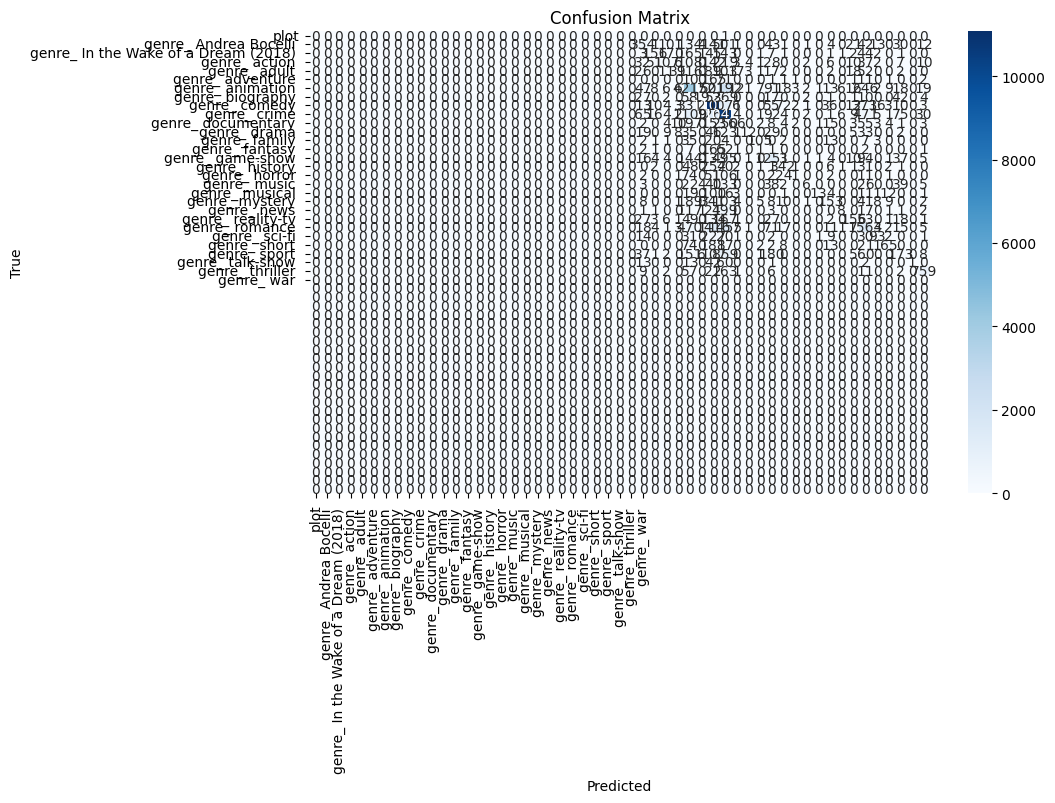

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_genres_single_label)
print(conf_matrix)
# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_encoded.columns[:-1], yticklabels=data_encoded.columns[:-1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


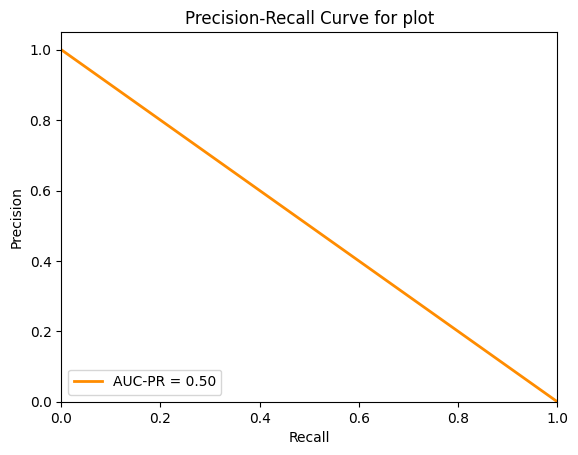

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


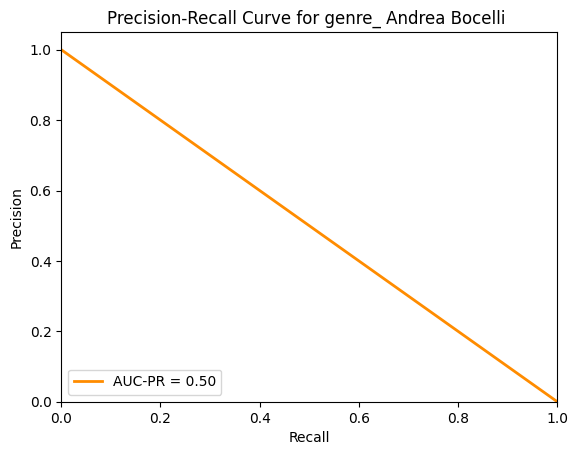

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


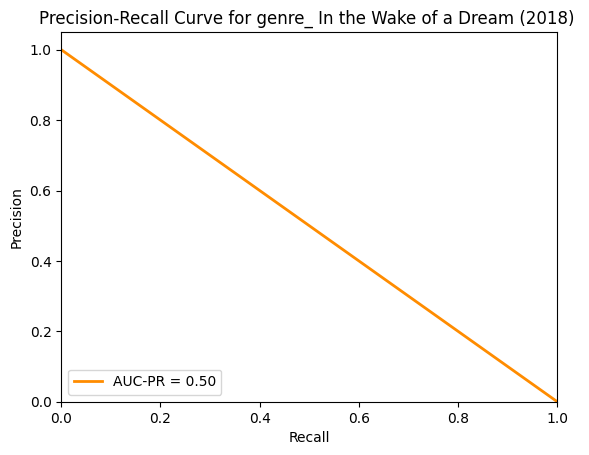

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


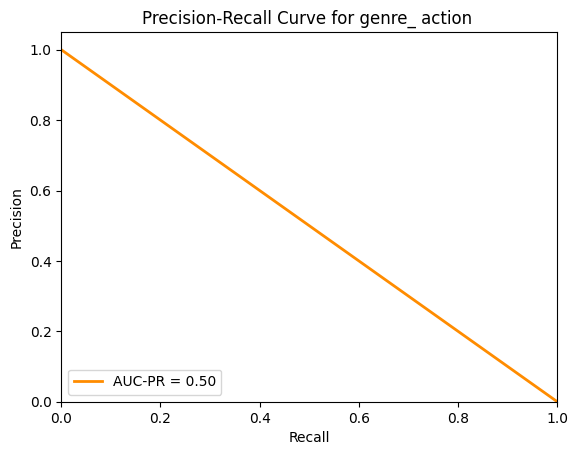

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


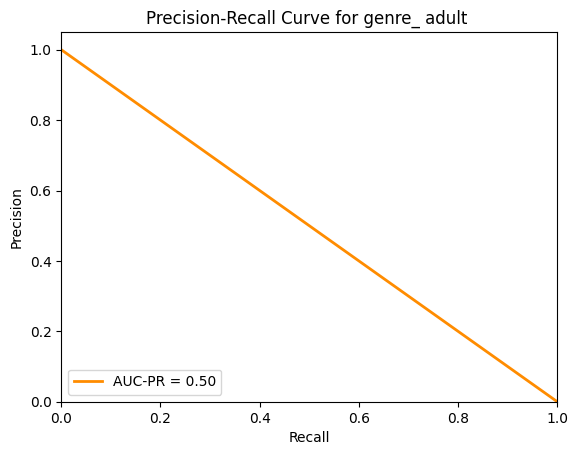

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


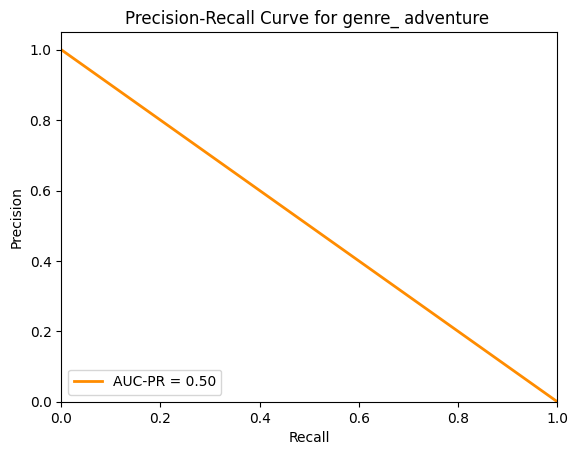

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


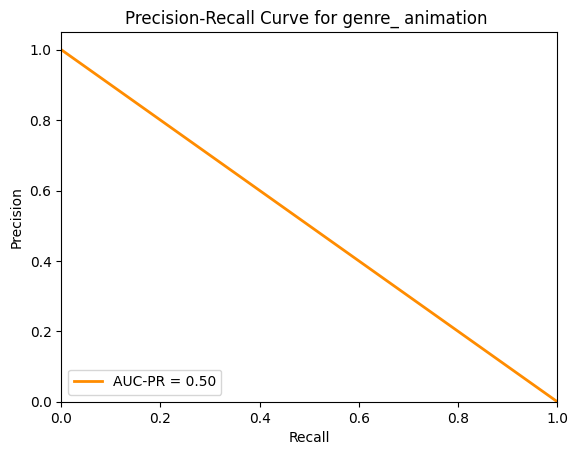

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


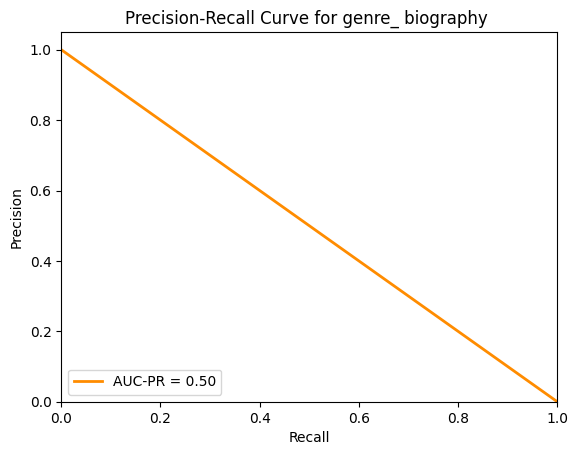

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


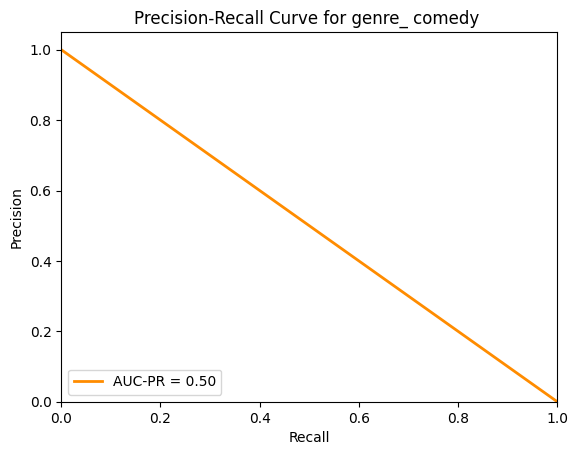

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


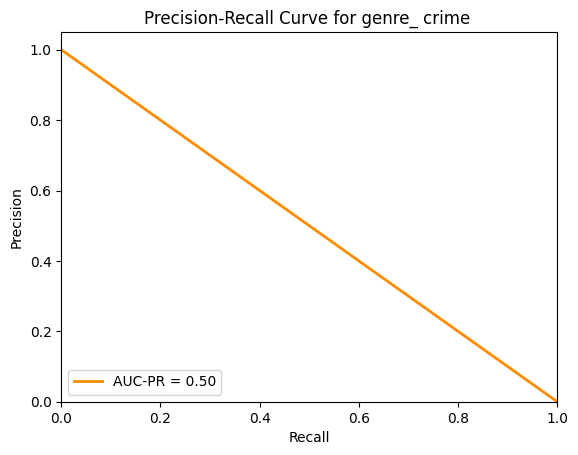

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


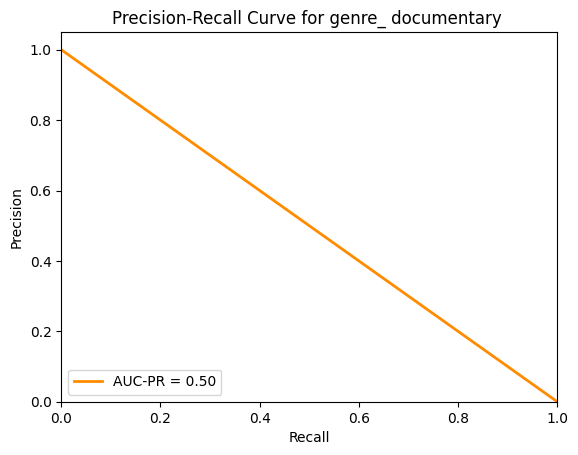

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


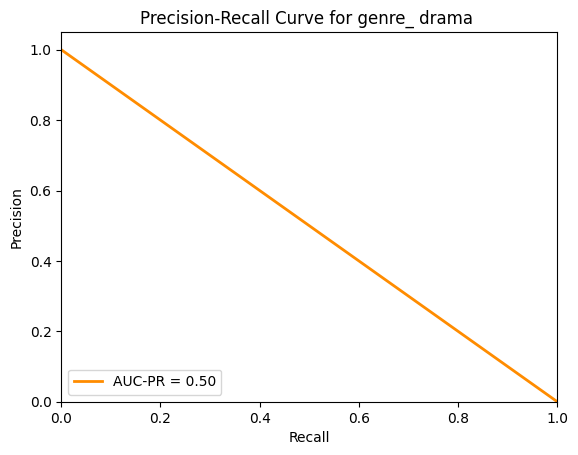

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


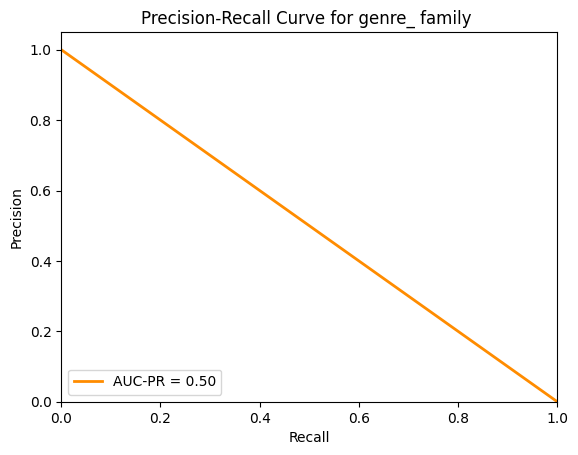

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


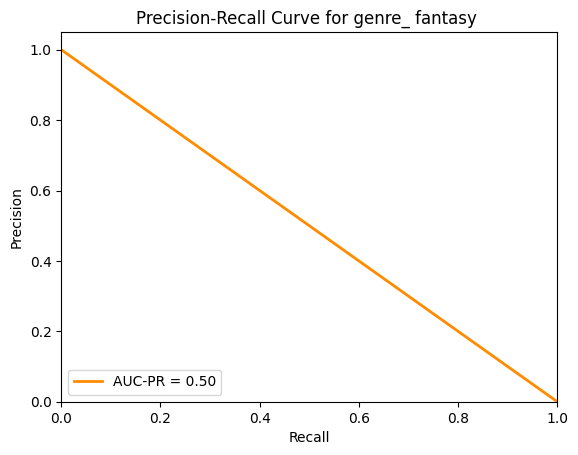

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


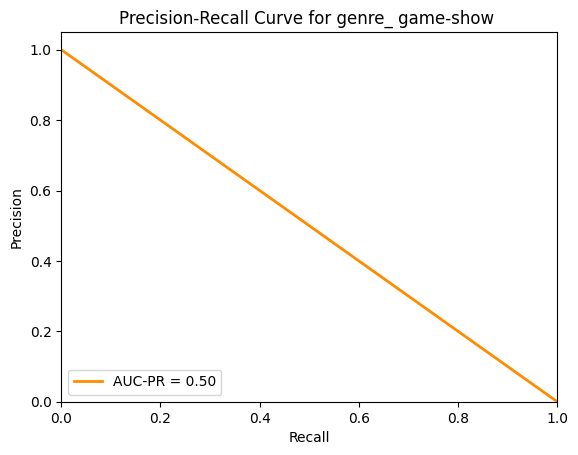

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


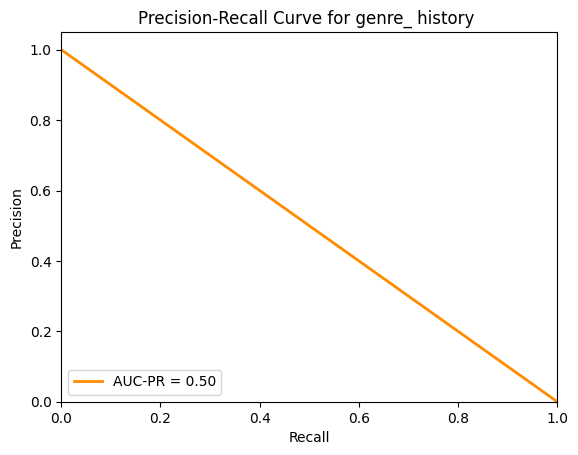

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


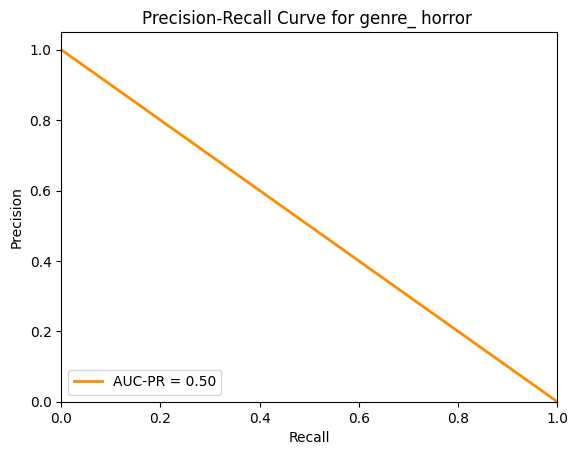

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


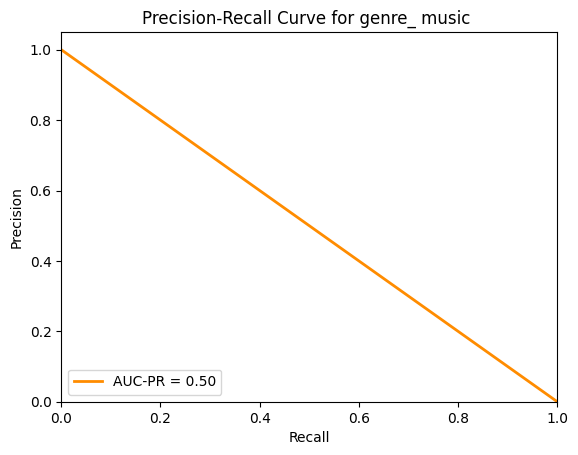

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


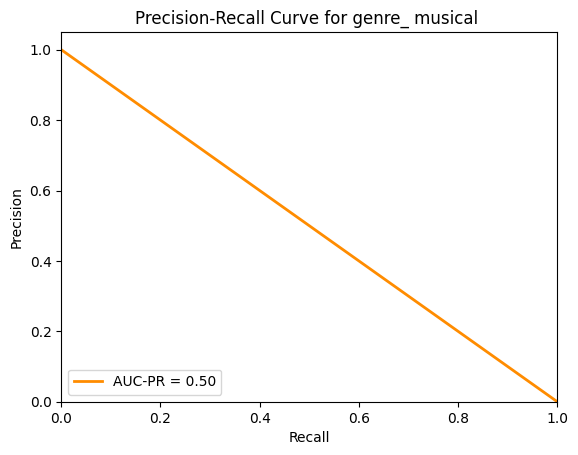

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


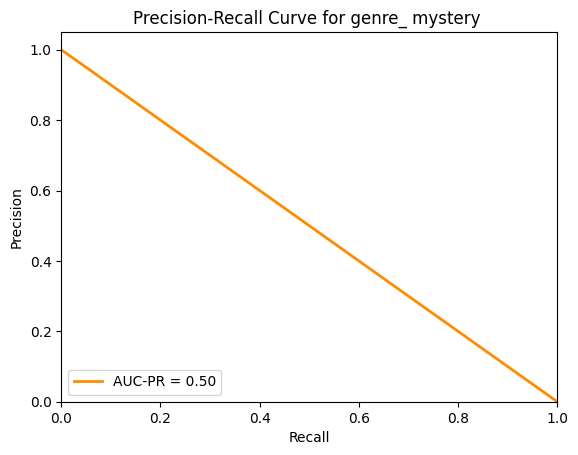

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


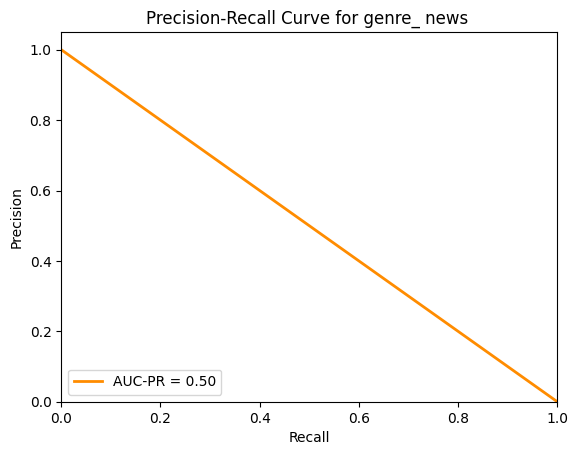

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


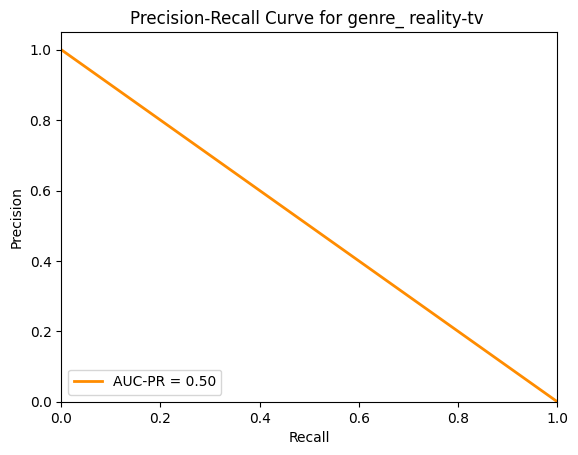

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


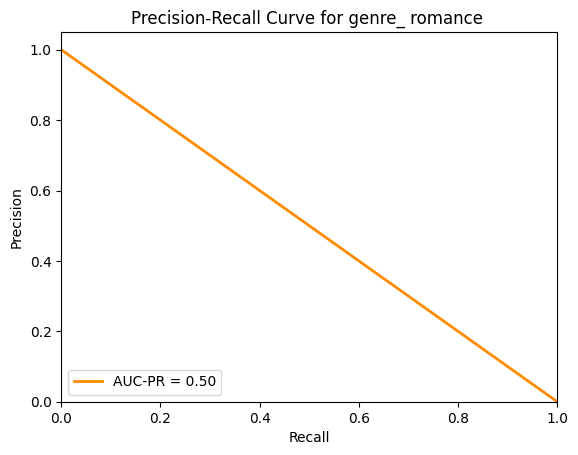

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


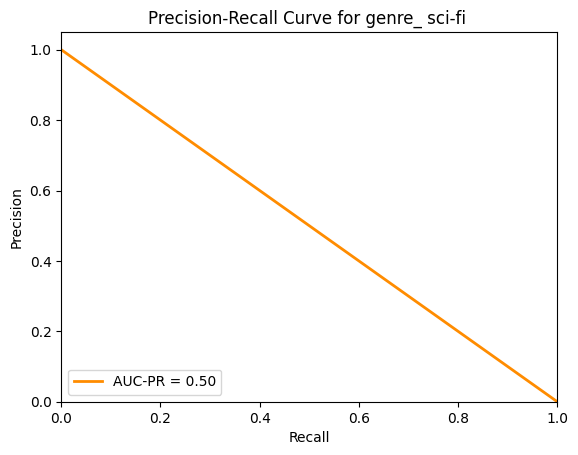

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


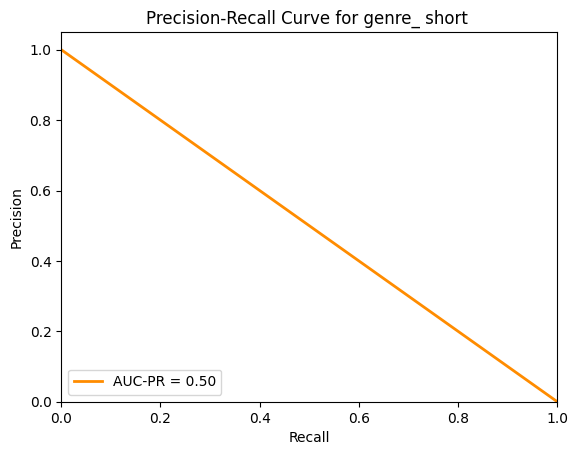

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


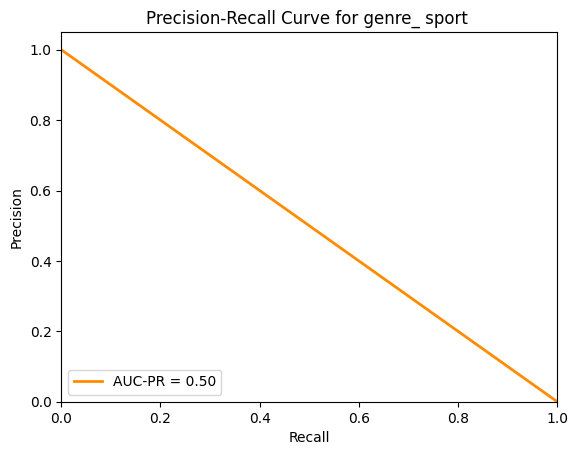

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


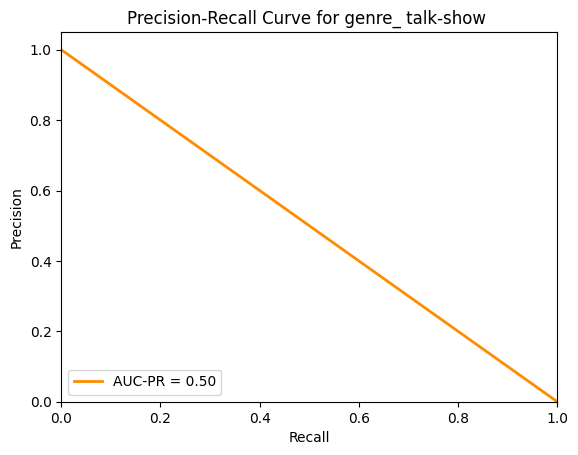

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


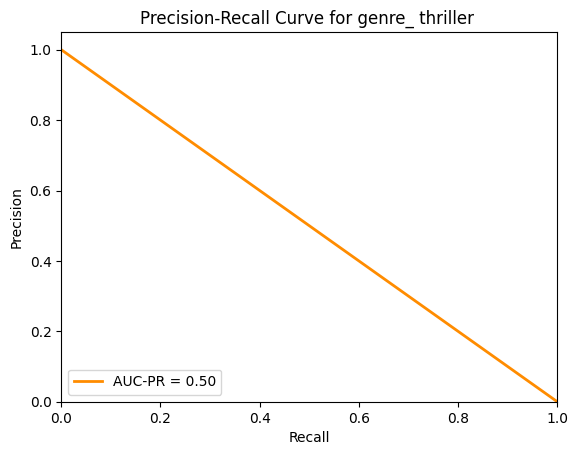

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


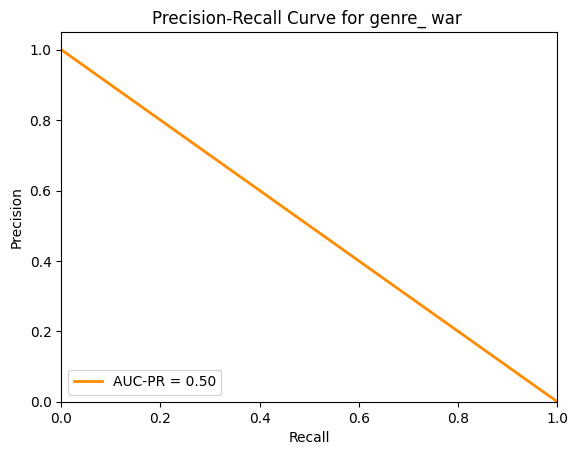

In [22]:
from sklearn.metrics import auc, precision_recall_curve
import matplotlib.pyplot as plt
# Assuming you have binary classification for each genre
for genre in data_encoded.columns[:-1]:
    true_labels_binary = (y_test == genre).astype(int)
    predicted_probabilities = classifier.predict_proba(X_test_tfidf)[:, data_encoded.columns.get_loc(genre)]
    precision, recall, _ = precision_recall_curve(true_labels_binary, predicted_probabilities)
    auc_pr = auc(recall, precision)
    # Plot Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC-PR = {auc_pr:.2f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {genre}')
    plt.legend(loc='lower left')
    plt.show()